In [1]:
#import required libraries

import numpy as np, pandas as pd
import matplotlib.pyplot as plt,seaborn as sns
%matplotlib inline

from IPython.core.display import display, HTML
display(HTML("<style>.container {width:100% !important;}</style>"))

import warnings
warnings.filterwarnings('ignore')


C:\Users\HP\AppData\Local\Temp\ipykernel_1988\563243420.py:7: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
#import data
train_data = pd.read_csv('train.csv')


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


### Understanding the Data

In [3]:
train_data.shape

(69999, 172)

In [4]:
train_data.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

In [5]:
train_data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    id                        69999 non-null  int64  
 1    circle_id                 69999 non-null  int64  
 2    loc_og_t2o_mou            69297 non-null  float64
 3    std_og_t2o_mou            69297 non-null  float64
 4    loc_ic_t2o_mou            69297 non-null  float64
 5    last_date_of_month_6      69999 non-null  object 
 6    last_date_of_month_7      69600 non-null  object 
 7    last_date_of_month_8      69266 non-null  object 
 8    arpu_6                    69999 non-null  float64
 9    arpu_7                    69999 non-null  float64
 10   arpu_8                    69999 non-null  float64
 11   onnet_mou_6               67231 non-null  float64
 12   onnet_mou_7               67312 non-null  float64
 13   onnet_mou_8               66296 non-null  fl

In [6]:
train_data.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000

- By the look of the data many variables seems insignificant for modelling with no variance. lets drop all of them first.

In [7]:
#Dropping insignificant columns from dataset
drop_list1= ['id','circle_id','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','std_og_t2c_mou_6'
             ,'std_og_t2c_mou_7','std_og_t2c_mou_8','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8']

train_data.drop(drop_list1, axis=1, inplace= True)

In [10]:
import numpy as np
x = np.array([1,2,3,4,6,5])
sort_index = np.argsort(x)
print(sort_index)

[0 1 2 3 5 4]


### Data Handling and Cleaning

In [8]:
train_data.columns.values

array(['last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'arpu_6', 'arpu_7', 'arpu_8',
       'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6',
       'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7',
       'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 's

- Looks like many columns have zeroes as values and let us treat them as null and remove the columns with more than 90% zeroes in a column

In [9]:

for i in train_data:
    if ((len(train_data[i].loc[train_data[i]==0])/len(train_data))>0.90):
        train_data.drop(i,axis=1,inplace=True)

In [10]:
#Checking for Missing Values

round(100*train_data.isnull().sum()/len(train_data),2)

last_date_of_month_6         0.00
last_date_of_month_7         0.57
last_date_of_month_8         1.05
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
onnet_mou_6                  3.95
onnet_mou_7                  3.84
onnet_mou_8                  5.29
offnet_mou_6                 3.95
offnet_mou_7                 3.84
offnet_mou_8                 5.29
roam_ic_mou_6                3.95
roam_ic_mou_7                3.84
roam_ic_mou_8                5.29
roam_og_mou_6                3.95
roam_og_mou_7                3.84
roam_og_mou_8                5.29
loc_og_t2t_mou_6             3.95
loc_og_t2t_mou_7             3.84
loc_og_t2t_mou_8             5.29
loc_og_t2m_mou_6             3.95
loc_og_t2m_mou_7             3.84
loc_og_t2m_mou_8             5.29
loc_og_t2f_mou_6             3.95
loc_og_t2f_mou_7             3.84
loc_og_t2f_mou_8             5.29
loc_og_t2c_mou_6             3.95
loc_og_t2c_mou_7             3.84
loc_og_t2c_mou

In [11]:
(100*train_data.isnull().sum()/len(train_data))>0

last_date_of_month_6        False
last_date_of_month_7         True
last_date_of_month_8         True
arpu_6                      False
arpu_7                      False
arpu_8                      False
onnet_mou_6                  True
onnet_mou_7                  True
onnet_mou_8                  True
offnet_mou_6                 True
offnet_mou_7                 True
offnet_mou_8                 True
roam_ic_mou_6                True
roam_ic_mou_7                True
roam_ic_mou_8                True
roam_og_mou_6                True
roam_og_mou_7                True
roam_og_mou_8                True
loc_og_t2t_mou_6             True
loc_og_t2t_mou_7             True
loc_og_t2t_mou_8             True
loc_og_t2m_mou_6             True
loc_og_t2m_mou_7             True
loc_og_t2m_mou_8             True
loc_og_t2f_mou_6             True
loc_og_t2f_mou_7             True
loc_og_t2f_mou_8             True
loc_og_t2c_mou_6             True
loc_og_t2c_mou_7             True
loc_og_t2c_mou

In [12]:
drop_list2= train_data.columns[(100*train_data.isnull().sum()/len(train_data))>70]

In [13]:
drop_list2

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7',
       'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8',
       'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6',
       'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7',
       'fb_user_8'],
      dtype='object')

In [14]:
train_data.drop(drop_list2, axis = 1, inplace = True)

In [15]:
train_data.shape

(69999, 117)

In [16]:
round(100*train_data.isnull().sum()/len(train_data),2)

last_date_of_month_6    0.00
last_date_of_month_7    0.57
last_date_of_month_8    1.05
arpu_6                  0.00
arpu_7                  0.00
arpu_8                  0.00
onnet_mou_6             3.95
onnet_mou_7             3.84
onnet_mou_8             5.29
offnet_mou_6            3.95
offnet_mou_7            3.84
offnet_mou_8            5.29
roam_ic_mou_6           3.95
roam_ic_mou_7           3.84
roam_ic_mou_8           5.29
roam_og_mou_6           3.95
roam_og_mou_7           3.84
roam_og_mou_8           5.29
loc_og_t2t_mou_6        3.95
loc_og_t2t_mou_7        3.84
loc_og_t2t_mou_8        5.29
loc_og_t2m_mou_6        3.95
loc_og_t2m_mou_7        3.84
loc_og_t2m_mou_8        5.29
loc_og_t2f_mou_6        3.95
loc_og_t2f_mou_7        3.84
loc_og_t2f_mou_8        5.29
loc_og_t2c_mou_6        3.95
loc_og_t2c_mou_7        3.84
loc_og_t2c_mou_8        5.29
loc_og_mou_6            3.95
loc_og_mou_7            3.84
loc_og_mou_8            5.29
std_og_t2t_mou_6        3.95
std_og_t2t_mou

- Let us impute all missing rows with Mean() or mode

In [17]:
numerical_features=[*train_data._get_numeric_data().columns]     # Selecting all Numerical variables
categorical_columns=[*set(train_data.columns)-set(numerical_features)]   # Selecting all Categories variables
upzlist= train_data.columns[(100*train_data.isnull().sum()/len(train_data))>0]   # Selecting all variables with more than 0 missing values


for i in upzlist:
    if i in numerical_features:
         train_data[i].fillna(train_data[i].mean(), inplace = True)
    else:
         train_data[i].fillna(train_data[i].mode()[0], inplace = True)


In [18]:
train_data.shape

(69999, 117)

In [19]:
train_data.head()

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,65.09,204.99,1.01,8.20,0.63,0.00,0.38,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,0.0,0.00,0.00,0.0,0.00,0.0,0,0,0,1958,0.0,0.0,0.0,0
1,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,30.73,31.66,0.00,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,0.0,352.91,0.00,0.0,3.96,0.0,0,0,0,710,0.0,0.0,0.0,0
2,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.00,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.0,0.00,0.0,0.0,28.94,84.99,0.00,2.89,1.38,0.00,0.00,56.49,99.36,0.00,4.51,6.16,6.49,89.86,25.18,23.51,0.00,0.00,0.00,94.38,31.34,30.01,11.69,0.00,0.00,18.21,2.48,6.38,0.0,0.0,0.0,29.91,2.48,6.38,124.29,33.83,36.64,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.25,2,4,2,70,120,0,70,70,0,6/11/2014,7/22/2014,8/24/2014,70,50,0,0.0,0.00,0.00,0.0,0.00,0.0,0,0,0,882,0.0,0.0,0.0,0
3,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,111.095,7.26,16.01,0.00,68.76,78.48,50.23,0.00,0.0,0.0,0.00,0.0,1.63,6.99,3.94,0.00,37.91,44.89,23.63,0.00,0.00,0.00,0.00,0.00,8.03,44.91,48.84,23.63,0.26,12.06,0.00,15.33,25.93,4.6,0.56,0.0,0.0,16.16,37.99,4.60,14.95,9.13,25.61,0.00,76.03,95.98,53.84,24.98,4.84,23.88,53.99,44.23,57.14,7.23,0.81,0.00,86.21,49.89,81.03,0.00,0.00,0.00,8.89,0.28,2.81,0.0,0.0,0.0,8.89,0.28,2.81,95.11,50.18,83.84,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,2,4,3,160,240,13

## Exploratory Data Analysis

In [20]:
len(numerical_features)

111

<AxesSubplot:>

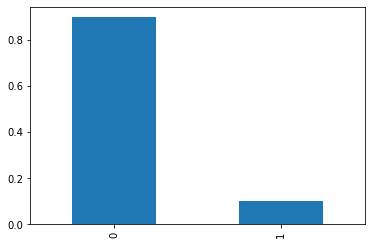

In [21]:
train_data["churn_probability"].value_counts(normalize= True).plot(kind='bar')


- At Churn percentage at 10 data seems highly imbalanced

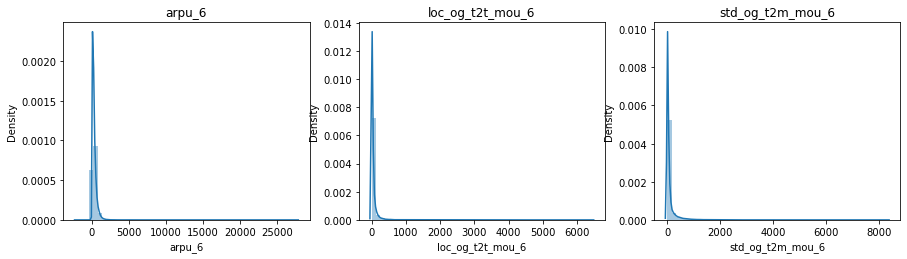

In [22]:
plt.figure(figsize=(15, 8))

plt.subplot(2,3,1, frameon = True)
sns.distplot(train_data.arpu_6)


plt.title('arpu_6')


plt.subplot(2,3,2)
sns.distplot(train_data.loc_og_t2t_mou_6)
plt.title('loc_og_t2t_mou_6')

plt.subplot(2,3,3)
sns.distplot(train_data.std_og_t2m_mou_6)
plt.title('std_og_t2m_mou_6')
          
plt.show()

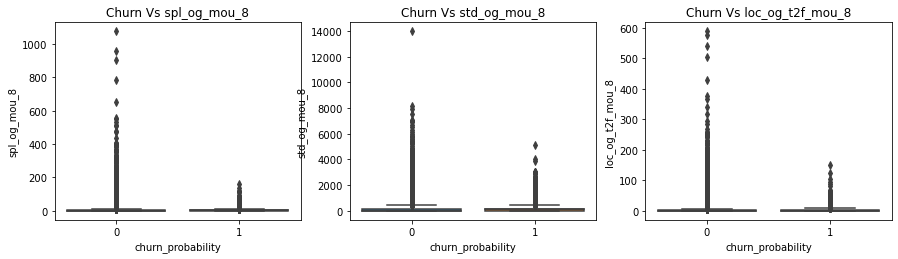

In [23]:
plt.figure(figsize=(15, 8))

plt.subplot(2,3,1, frameon = True)
sns.boxplot(x = train_data["churn_probability"], y = train_data["spl_og_mou_8"])


plt.title('Churn Vs spl_og_mou_8')


plt.subplot(2,3,2)
sns.boxplot(x = train_data["churn_probability"], y = train_data["std_og_mou_8"])
plt.title('Churn Vs std_og_mou_8')

plt.subplot(2,3,3)
sns.boxplot(x = train_data["churn_probability"], y = train_data["loc_og_t2f_mou_8"])
plt.title('Churn Vs loc_og_t2f_mou_8')
          
plt.show()



In [24]:
len(categorical_columns)

6

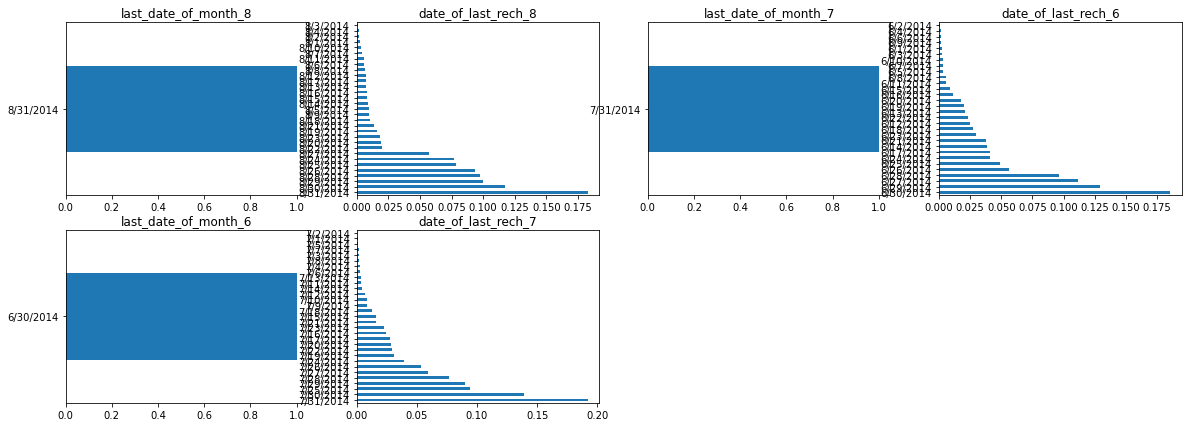

In [25]:
#Plotting all categorial variables
plt.figure(figsize=[20,7])
for ind, col in enumerate(categorical_columns):
    plt.subplot(2,4,ind+1)
    train_data[col].value_counts(normalize=True).plot.barh()
    plt.title(col)
plt.show()

Observations from Date Columns:
- Most people are recharging on last day of the month in all three months.
- Let us derive date from the columns
- As last date does not change in all three columns last_date_of_month_8,last_date_of_month_7 and last_date_of_month_6, let us drop these columns.

In [26]:
# As we can see date cols are in object format, lets change them to datetime using pandas
train_data[["date_of_last_rech_6", "date_of_last_rech_7", "date_of_last_rech_8"]] = train_data[["date_of_last_rech_6", "date_of_last_rech_7", "date_of_last_rech_8"]].apply(pd.to_datetime)

In [27]:
#Extract Day column from three columns
train_data["day_of_last_rech_6"] = train_data['date_of_last_rech_6'].dt.day
train_data["day_of_last_rech_7"] = train_data['date_of_last_rech_7'].dt.day
train_data["day_of_last_rech_8"] = train_data['date_of_last_rech_8'].dt.day

In [28]:
train_data.columns

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6',
       ...
       'sachet_2g_7', 'sachet_2g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g',
       'jun_vbc_3g', 'churn_probability', 'day_of_last_rech_6',
       'day_of_last_rech_7', 'day_of_last_rech_8'],
      dtype='object', length=120)

In [29]:
# Lets drop all date cols now
train_data.drop(categorical_columns, axis = 1, inplace = True)


* Let us check correlation of all variables 

In [30]:
train_data.corr()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,day_of_last_rech_6,day_of_last_rech_7,day_of_last_rech_8
arpu_6,1.000000,0.743730,0.643193,0.440851,3.221784e-01,0.261966,0.604531,0.453680,0.363763,0.128165,0.088456,0.086656,0.231109,0.171268,0.141339,0.229933,0.197144,0.182467,0.422971,0.358203,0.316540,0.183968,0.160609,1.507872e-01,0.065731,0.025964,0.018617,0.419410,0.356442,0.319719,0.356429,0.246899,0.188515,0.378429,0.263551,0.185856,0.084692,0.065749,0.057538,0.480571,0.334481,0.245845,0.118598,0.067181,0.058457,0.046787,0.667009,0.491677,0.387790,0.104298,0.085223,0.083831,0.229286,0.199480,0.175334,0.065732,0.058415,0.056452,0.221202,0.189010,0.173156,0.101921,0.074182,0.060233,0.108653,0.079018,0.069661,0.036357,0.036831,0.028476,0.139791,0.102155,0.086658,0.274957,0.217625,0.188489,0.028610,-0.081845,-0.050724,0.086338,0.060404,0.058612,0.021562,0.030051,0.015902,0.503610,0.289559,0.198571,0.952776,0.726028,0.626760,0.449690,0.372918,0.323384,0.350010,0.309450,0.220152,0.089947,0.052497,0.038079,0.249904,0.200779,0.190453,0.049431,0.026238,0.029319,0.025875,0.168365,0.184225,0.217785,0.025351,0.255554,0.128352,0.103961
arpu_7,0.743730,1.000000,0.782332,0.316630,4.216735e-01,0.335421,0.461318,0.589029,0.459456,0.096648,0.097367,0.090855,0.166612,0.204295,0.163488,0.176745,0.222849,0.188565,0.322018,0.411941,0.343846,0.160831,0.189929,1.621489e-01,0.036718,0.053819,0.040142,0.321418,0.407772,0.341170,0.249575,0.345682,0.268159,0.279778,0.381123,0.276819,0.069444,0.087635,0.066358,0.346365,0.476141,0.357601,0.082976,0.102752,0.082637,0.023256,0.492247,0.652750,0.511814,0.073050,0.092566,0.086633,0.168991,0.217622,0.183751,0.053223,0.060758,0.059105,0.161652,0.205456,0.180767,0.075820,0.096017,0.084415,0.079611,0.103455,0.089435,0.036782,0.043016,0.034721,0.104597,0.132466,0.114530,0.197124,0.256449,0.223863,0.007426,-0.056658,-0.041263,0.059831,0.068674,0.060283,0.017135,0.030417,0.019818,0.334458,0.453908,0.309685,0.751131,0.955298,0.767195,0.375192,0.488844,0.405791,0.329590,0.400732,0.273247,0.058506,0.091960,0.061617,0.185759,0.270625,0.217570,0.023609,0.058365,0.044841,0.023818,0.189943,0.218318,0.171154,-0.057809,0.226730,0.228719,0.122033
arpu_8,0.643193,0.782332,1.000000,0.240991,3.215667e-01,0.410018,0.370585,0.464738,0.579771,0.085733,0.078180,0.102917,0.151761,0.161026,0.205060,0.154083,0.183587,0.217280,0.286495,0.342616,0.408489,0.152489,0.163529,1.837769e-01,0.0

In [31]:
# Dropping all columns with more than 70% correlation

corr_matrix = train_data.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.70)]

In [32]:
train_data.shape

(69999, 114)

In [33]:
len(to_drop)

54

In [34]:
train_data.drop(to_drop, axis=1, inplace=True)

In [35]:
train_data.shape

(69999, 60)

    ### Handling Outliers

<AxesSubplot:>

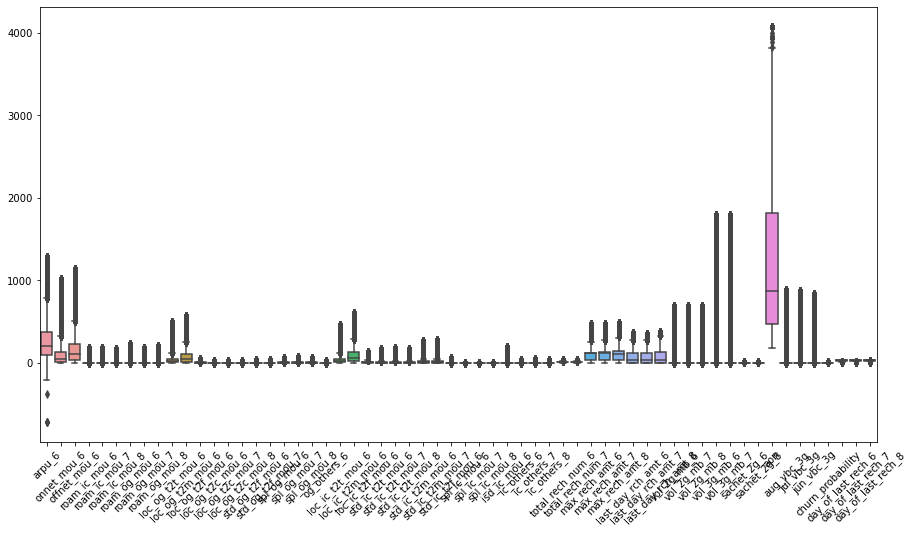

In [42]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.boxplot(data = train_data)

- Looks like data is mostly affected by outliers


## Model building

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
df_train, df_test = train_test_split(train_data, test_size=0.2, random_state=42, stratify=train_data. churn_probability)

#### MinMax scaling for numeric features

In [55]:
from sklearn.preprocessing import MinMaxScaler

In [53]:
df_train.describe()

,arpu_6,onnet_mou_6,offnet_mou_6,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,loc_ic_t2t_mou_6,loc_ic_t2m_mou_6,loc_ic_t2f_mou_6,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2f_mou_6,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,sachet_2g_6,sachet_2g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,day_of_last_rech_6,day_of_last_rech_7,day_of_last_rech_8
count,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000
mean,271.226541,112.214246,180.279107,5.492604,3.526663,3.545809,8.575119,5.384698,5.393959,36.639579,83.864029,2.793897,0.761137,0.923666,0.981120,0.578064,0.537665,3.061743,3.878334,3.990699,0.346678,38.980578,97.739896,9.224999,6.474828,6.758890,6.691562,15.470748,16.217720,1.198353,0.056234,0.023554,0.031177,3.671333,0.408137,0.473476,0.457671,7.264908,7.413045,98.243502,97.754577,101.288045,58.810121,54.955885,57.805358,34.235400,33.122438,32.085040,84.575503,89.521097,0.257076,0.310041,1220.751108,46.645740,43.825381,38.980287,0.101895,24.238548,25.637824,25.726009
std,249.326870,177.341271,213.415677,16.821633,12.165728,11.888963,24.892685,17.376536,17.346671,58.370370,105.800853,5.887307,2.086573,2.513229,2.521752,2.014154,1.926145,6.286622,7.653264,7.511131,0.938491,56.491151,111.371090,17.862521,14.773568,15.526994,15.248941,28.985980,30.499348,3.672002,0.122174,0.070420,0.086823,12.901406,1.437404,1.664620,1.538229,5.707243,5.740549,83.234100,84.455330,89.156908,67.140096,67.470859,72.716606,100.191667,97.703710,95.248565,252.426336,261.689510,0.753634,0.882762,953.198368,136.757717,132.030860,120.338266,0.302512,6.039125,5.605358,5.775935
min,-514.294914,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000,6.125494,8.809085,8.179297
25%,93.318000,8.110000,36.880000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.900000,10.840000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.340000,18.390000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,30.000000,30.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,468.000000,0.000000,0.000000,0.000000,0.000000,21.000000,23.000000,24.000000
50%,197.007000,37.790000,103.940000,0.000000,0.000000,0.000000,

In [56]:
scaler = MinMaxScaler()
df_train.loc[:, df_train.columns != 'churn_probability'] = scaler.fit_transform(df_train.loc[:, df_train.columns != 'churn_probability'])
df_train.describe()

,arpu_6,onnet_mou_6,offnet_mou_6,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,loc_ic_t2t_mou_6,loc_ic_t2m_mou_6,loc_ic_t2f_mou_6,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2f_mou_6,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,sachet_2g_6,sachet_2g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,day_of_last_rech_6,day_of_last_rech_7,day_of_last_rech_8
count,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000
mean,0.497290,0.151231,0.201536,0.063708,0.051571,0.053148,0.071233,0.060999,0.059535,0.135362,0.190603,0.107705,0.079725,0.077763,0.086034,0.053339,0.050587,0.110077,0.111201,0.121890,0.077258,0.150900,0.208640,0.117587,0.089471,0.088020,0.088690,0.114597,0.114002,0.060117,0.123830,0.079763,0.089581,0.049876,0.042613,0.043522,0.045764,0.287211,0.290502,0.264345,0.261214,0.259157,0.213444,0.202887,0.198696,0.078437,0.077118,0.075583,0.078975,0.080948,0.080067,0.084154,0.267058,0.080950,0.077775,0.074787,0.101895,0.758678,0.758362,0.768894
std,0.157841,0.239003,0.238580,0.195112,0.177902,0.178202,0.206783,0.196844,0.191461,0.215645,0.240460,0.226955,0.218556,0.211589,0.221131,0.185851,0.181226,0.226020,0.219437,0.229417,0.209146,0.218687,0.237737,0.227686,0.204145,0.202206,0.202109,0.214710,0.214395,0.184211,0.269033,0.238473,0.249465,0.175268,0.150078,0.153014,0.153812,0.225631,0.224961,0.223959,0.225676,0.228118,0.243677,0.249090,0.249951,0.229549,0.227482,0.224378,0.235711,0.236628,0.234720,0.239607,0.244592,0.237332,0.234309,0.230880,0.302512,0.252953,0.252597,0.253101
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.384662,0.010930,0.041229,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007019,0.024637,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012930,0.039256,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.118602,0.117564,0.080721,0.080164,0.076758,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.073901,0.000000,0.000000,0.000000,0.000000,0.623029,0.639492,0.693261
50%,0.450304,0.050930,0.116196,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.049062,0.101797,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

In [59]:
df_test.loc[:, df_test.columns != 'churn_probability'] = scaler.fit_transform(df_test.loc[:, df_train.columns != 'churn_probability'])


## Building predictive models

In [57]:
X_train = df_train.drop('churn_probability', axis=1)
y_train = df_train['churn_probability']
X_test = df_test.drop('churn_probability', axis=1)
y_test = df_test['churn_probability']

In [58]:
y_train.shape, y_test.shape,X_train.shape

((55999,), (14000,), (55999, 59))

### Running the first model on all available features

##### Logistic regression

In [60]:
sharesshares

In [104]:
# Logistic regression model
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                55999
Model:                            GLM   Df Residuals:                    55939
Model Family:                Binomial   Df Model:                           59
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13360.
Date:                Mon, 29 Aug 2022   Deviance:                       26720.
Time:                        16:34:00   Pearson chi2:                 3.27e+05
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1658
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0013      0.103      0.013      0.990      -0.200       0.203
arpu_6                 1.4300      0.243      5.879      0.000       0.953       1.907
onnet_mou_6            0.8974      0.089     10.027      0.000       0.722       1.073
offnet_mou_6           1.0896      0.105     10.345      0.000       0.883       1.296
roam_ic_mou_6         -0.3264      0.132     -2.482      0.013      -0.584      -0.069
roam_ic_mou_7          0.1702      0.136      1.253      0.210      -0.096       0.437
roam_ic_mou_8          0.7238      0.124      5.856      0.000       0.482       0.966
roam_og_mou_6          0.3902      0.118      3.319      0.001       0.160       0.621
roam_og_mou_7          0.4006      0.114      3.509      0.000       0.177       0.624
roam_og_mou_8          2.0807      0.110     18.937      0.000       1.865       2.296
loc_og_t2t_mou_6      -0.2147      0.129     -1.661      0.097      -0.468       0.039
loc_og_t2m_mou_6      -0.0242      0.126     -0.191      0.848      -0.272       0.224
loc_og_t2f_mou_6       0.1002      0.106      0.941      0.347      -0.109       0.309
loc_og_t2c_mou_6      -0.1916      0.093     -2.067      0.039      -0.373      -0.010
loc_og_t2c_mou_7       0.2700      0.101      2.661      0.008       0.071       0.469
loc_og_t2c_mou_8       0.3952      0.108      3.662      0.000       0.184       0.607
std_og_t2f_mou_6      -0.2500      0.122     -2.046      0.041      -0.490      -0.010
std_og_t2f_mou_7       0.3397      0.120      2.828      0.005       0.104       0.575
spl_og_mou_6          -0.0228      0.096     -0.237      0.812      -0.211       0.166
spl_og_mou_7           0.3167      0.110      2.872      0.004       0.101       0.533
spl_og_mou_8          -0.2382      0.118     -2.021      0.043      -0.469      -0.007
og_others_6            0.2238      0.079      2.844      0.004       0.070       0.378
loc_ic_t2t_mou_6      -0.3187      0.111     -2.863      0.004      -0.537      -0.101
loc_ic_t2m_mou_6      -0.5720      0.113     -5.080      0.000      -0.793      -0.351
loc_ic_t2f_mou_6      -0.2611      0.103     -2.524      0.012      -0.464      -0.058
std_ic_t2t_mou_6      -0.0181      0.101     -0.179      0.858      -0.216       0.180
std_ic_t2t_mou_7       0.2489      0.117      2.123      0.034       0.019       0.479
std_ic_t2t_mou_8       0.1372      0.113      1.209      0.227      -0.085       0.360
std_ic_t2m_mou_6       0.1410      0.103      1.369      0.171      -0.061       0.343
std_ic_t2m_mou_7      -0.1665      0.108     -1.538      0.124      -0.379       0.046
std_ic_t2f_mou_6      -0.0469      0.115     -0.409      0.682      -0.272       0.178
spl_ic_mou_6          -0.2403      0.068     -3.543      0.000      -0.373      -0.107
spl_ic_mou_7          -0.0853      0.0

### Feature Selection Using RFE

In [91]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
# running RFE with 15 variables as output 
    
rfe = RFE(estimator=logreg, n_features_to_select=15)          
rfe = rfe.fit(X_train,y_train)

print(rfe.ranking_)

[ 1  5  3 19 32  1 18 10  1 28 43 38 30 11 25 16 15 44 17 26 27 12  1 22
 45 14 35 34 33 42 21 39  1  9 41 36  1  7  1 40  1  1 31  6  1 37  4  1
 23  2  8  1  1  1 24 13 20 29  1]


In [136]:
col = X_train.columns[rfe.support_]
X_train1 =X_train[col]

In [137]:
from sklearn import metrics
logsk = LogisticRegression(C=1e9)

logsk.fit(X_train1, y_train)

LogisticRegression(C=1000000000.0)

In [105]:
X_train_sm = sm.add_constant(X_train1)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
model1 = logm2.fit()
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                55999
Model:                            GLM   Df Residuals:                    55983
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13671.
Date:                Mon, 29 Aug 2022   Deviance:                       27342.
Time:                        16:35:17   Pearson chi2:                 3.57e+05
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1565
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.7888      0.067    -11.853      0.000      -0.919      -0.658
arpu_6                 3.0077      0.116     25.881      0.000       2.780       3.236
roam_ic_mou_8          0.9025      0.111      8.124      0.000       0.685       1.120
roam_og_mou_8          2.2726      0.103     21.965      0.000       2.070       2.475
loc_ic_t2m_mou_6      -0.8644      0.085    -10.174      0.000      -1.031      -0.698
spl_ic_mou_8          -1.1378      0.087    -13.140      0.000      -1.308      -0.968
ic_others_8            0.8641      0.106      8.155      0.000       0.656       1.072
total_rech_num_7      -1.6370      0.083    -19.734      0.000      -1.800      -1.474
max_rech_amt_7        -0.7252      0.089     -8.142      0.000      -0.900      -0.551
max_rech_amt_8        -3.8005      0.134    -28.445      0.000      -4.062      -3.539
last_day_rch_amt_8    -3.4582      0.150    -23.008      0.000      -3.753      -3.164
vol_2g_mb_8           -0.8219      0.158     -5.210      0.000      -1.131      -0.513
sachet_2g_8           -1.5353      0.134    -11.484      0.000      -1.797      -1.273
aon                   -2.0938      0.085    -24.491      0.000      -2.261      -1.926
aug_vbc_3g            -0.5501      0.127     -4.325      0.000      -0.799      -0.301
day_of_last_rech_8    -0.9548      0.058    -16.455      0.000      -1.068      -0.841
======================================================================================
"""

### Making Predictions

In [107]:
y_train_pred = model1.predict(X_train_sm)
y_train_pred[:10]

38032    0.011917
69689    0.375183
8224     0.070662
40850    0.298526
69476    0.000289
56944    0.010671
11076    0.019283
33642    0.004000
5748     0.375074
8724     0.101062
dtype: float64

In [108]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([1.19167797e-02, 3.75182924e-01, 7.06623409e-02, 2.98526190e-01,
       2.88558637e-04, 1.06706244e-02, 1.92831507e-02, 4.00027993e-03,
       3.75074292e-01, 1.01062036e-01])

In [110]:
y_train_pred_final = pd.DataFrame({'churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['id'] = y_train.index
y_train_pred_final.head()

,churn,Churn_Prob,id
0,0,0.011917,38032
1,1,0.375183,69689
2,0,0.070662,8224
3,0,0.298526,40850
4,0,0.000289,69476


In [112]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,churn,Churn_Prob,id,predicted
0,0,0.011917,38032,0
1,1,0.375183,69689,0
2,0,0.070662,8224,0
3,0,0.298526,40850,0
4,0,0.000289,69476,0


In [113]:
from sklearn import metrics

In [115]:
# Confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.churn, y_train_pred_final.predicted )
print(confusion)

[[49635   658]
 [ 4762   944]]


In [117]:
# Check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.churn, y_train_pred_final.predicted))

0.9032125573670958


- Accuracy of logistic regression using RFE is giving 90% accuracy
- arpu_6,roam_ic_mou_8 and roam_og_mou_8 are top three variables.

### Using RandomForest

In [122]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42, n_estimators=50, oob_score=True)
rf.fit(X_train1, y_train)

RandomForestClassifier(n_estimators=50, oob_score=True, random_state=42)

In [124]:
y_train_pred = rf.predict(X_train1)

In [125]:
accuracy_score(y_train, y_train_pred)

0.999589278379971

In [127]:
y_test_pred = rf.predict(X_test[col])

In [128]:
accuracy_score(y_test, y_test_pred)

0.8980714285714285

- By looking at above accuracy score, Random forest model looks overfit on unseen data

# Model evaluation: Cross validation

In [129]:
from sklearn.model_selection import cross_val_score

In [141]:
cross_val_score(logsk, X_train1, y_train, cv=5, n_jobs=-1)

array([0.90303571, 0.90383929, 0.90321429, 0.90375   , 0.90231271])

In [132]:
cross_val_score(rf, X_train1, y_train, cv=5, n_jobs=-1)

array([0.93660714, 0.93910714, 0.93678571, 0.93821429, 0.93508349])

In [133]:
cross_val_score(rf, X_train, y_train, cv=5, n_jobs=-1, scoring="recall")

array([0.52059597, 0.53900088, 0.52322524, 0.53064799, 0.52410167])

In [142]:
cross_val_score(logsk, X_train, y_train, cv=5, n_jobs=-1, scoring="recall")

array([0.22611744, 0.20070114, 0.19544259, 0.1943958 , 0.20858896])

In [143]:
cross_val_score(rf, X_train, y_train, cv=5, n_jobs=-1, scoring="precision")

array([0.79094541, 0.78745198, 0.77937337, 0.80371353, 0.79415671])

In [144]:
cross_val_score(logsk, X_train, y_train, cv=5, n_jobs=-1, scoring="precision")

array([0.59310345, 0.59947644, 0.5883905 , 0.62011173, 0.60406091])

## Using PCA for Feature elimination

In [145]:
from sklearn.decomposition import PCA

In [147]:
pca = PCA(random_state=42)
pca.fit(X_train)

PCA(random_state=42)

In [148]:
pca.components_

array([[ 1.93309948e-01,  1.26898718e-01,  2.05968327e-01, ...,
         8.35621751e-02,  5.28650445e-02,  7.95537107e-03],
       [ 1.11009377e-01,  1.77033788e-01,  1.60950965e-01, ...,
         2.61659021e-01,  2.20627083e-01,  2.18566026e-01],
       [-8.41720851e-02, -1.71790420e-01, -2.23597122e-01, ...,
        -4.07000015e-02, -1.23743092e-02,  1.73054879e-02],
       ...,
       [ 2.02623877e-02, -3.85041816e-03, -6.72561185e-03, ...,
         6.44058730e-03, -5.05991282e-03, -2.90036844e-03],
       [ 6.34457057e-04, -6.89333555e-03, -4.23110511e-04, ...,
        -3.09523939e-03,  5.88544801e-03,  2.63563387e-03],
       [-9.10163183e-01,  1.52507430e-01,  2.08748085e-01, ...,
        -5.55706184e-03,  1.12696525e-03,  6.28698844e-03]])

In [152]:
pca.explained_variance_ratio_

array([0.1174299 , 0.07807992, 0.07185739, 0.05040362, 0.04202409,
       0.0388302 , 0.03591021, 0.03204994, 0.02870372, 0.02567156,
       0.02272169, 0.02149397, 0.01919562, 0.01905943, 0.01807865,
       0.0177375 , 0.01722798, 0.01706008, 0.01635016, 0.01615242,
       0.01568962, 0.01531264, 0.01505614, 0.01456788, 0.0142835 ,
       0.01374997, 0.01339212, 0.01180714, 0.01113745, 0.01073651,
       0.00971693, 0.00900582, 0.00867638, 0.0085125 , 0.00841991,
       0.0082211 , 0.00805323, 0.00737057, 0.00694184, 0.00603244,
       0.00580672, 0.00564687, 0.00550926, 0.00548087, 0.00504555,
       0.00499349, 0.00493477, 0.00481723, 0.00468726, 0.00437296,
       0.00399214, 0.00394923, 0.00378453, 0.00366436, 0.00320812,
       0.00234699, 0.00212142, 0.00164274, 0.00127371])

<BarContainer object of 59 artists>

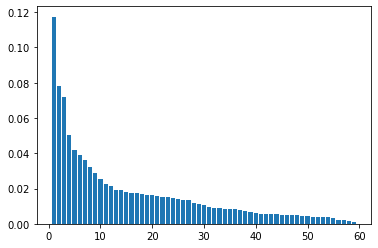

In [149]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

In [150]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

#### Making the scree plot

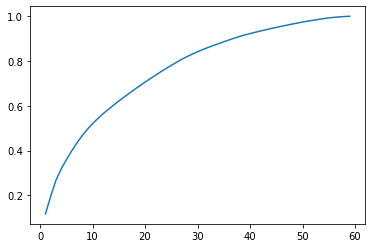

In [151]:
plt.plot(range(1,len(var_cumu)+1), var_cumu)

- Aroung 40 features explains 90% accuracy as per above screeplots. let us make a model with 40 features

In [204]:
pc2 =  PCA(0.9)
newdata = pc2.fit_transform(X_train)

In [205]:
newdata.shape

(55999, 37)

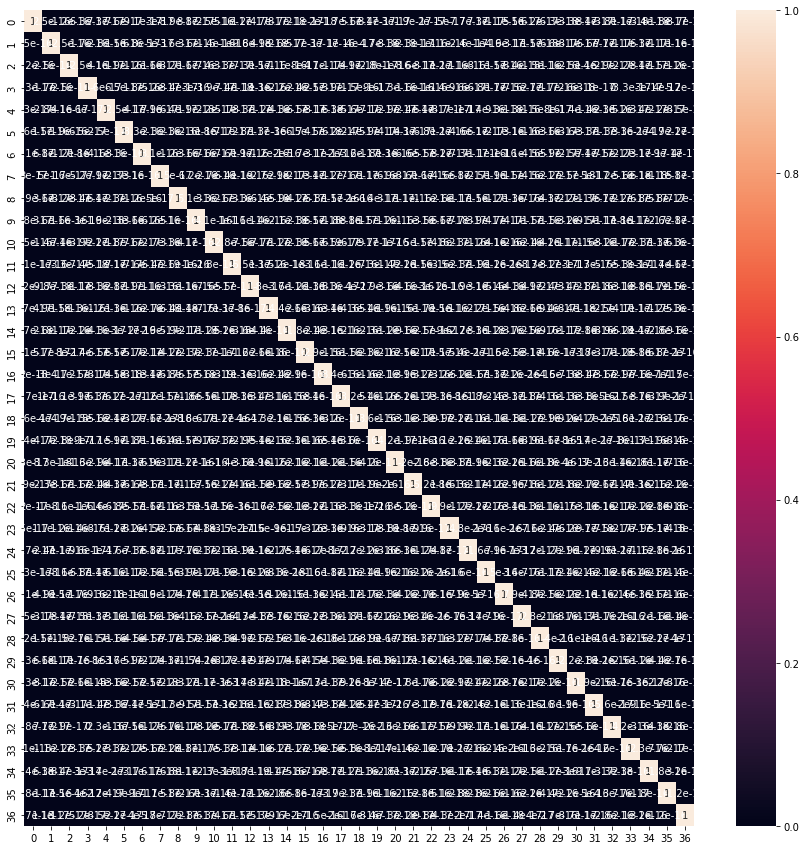

In [206]:
corrmat = np.corrcoef(newdata.transpose())
plt.figure(figsize=[15,15])
sns.heatmap(corrmat, annot=True)
plt.show()

In [207]:
learner_pca = LogisticRegression()

In [212]:
model2 = learner_pca.fit(newdata, y_train)

#Applying PCA on testset
newdata2 = pc2.transform(X_test)

# make the predictions
y_pred = learner_pca.predict(newdata2)

# convert prediction array into a dataframe
y_pred_df = pd.DataFrame(y_pred)
pred_probs_test2 = model2.predict_proba(newdata2)[:,1]
print("{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test2)))
print(confusion_matrix(y_test,y_pred))
print("Accuracy of the logistic regression model with PCA: ",accuracy_score(y_test,y_pred))

0.63
[[12455   119]
 [ 1324   102]]
Accuracy of the logistic regression model with PCA:  0.8969285714285714


In [ ]:
cross_val_score(learner_pca, X_train1, y_train, cv=5, n_jobs=-1)

In [209]:
col = list(X_train.columns)
df_pca = pd.DataFrame({'PC-1':pc2.components_[0],'PC-2':pc2.components_[1], 'PC-3':pc2.components_[2],'Feature':col})
df_pca.head(10)

,PC-1,PC-2,PC-3,Feature
0,0.193310,0.111009,-0.084172,arpu_6
1,0.126899,0.177034,-0.171790,onnet_mou_6
2,0.205968,0.160951,-0.223597,offnet_mou_6
3,0.041558,0.004280,-0.038152,roam_ic_mou_6
4,0.044750,0.008190,-0.045860,roam_ic_mou_7
5,0.048117,0.007970,-0.050077,roam_ic_mou_8
6,0.037263,0.015696,-0.044480,roam_og_mou_6
7,0.042525,0.020561,-0.054940,roam_og_mou_7
8,0.047077,0.019846,-0.056169,roam_og_mou_8
9,0.170120,0.046623,-0.167928,loc_og_t2t_mou_6


- Model has 89% accuracy
- And model churns 37 Features which explains 90% variance
- Most Important features are arpu6,onnet_mou_6 and offnet_mou_6

## Hyper-parameter tuning using Cross Validation

In [213]:
from sklearn.ensemble import RandomForestClassifier

In [223]:
from sklearn.model_selection import RandomizedSearchCV

In [224]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [225]:
hyper_params = {'max_depth': range(3, 20),
                'max_features': range(10, 40),
                'min_samples_leaf': range(20, 400, 50),
                'n_estimators': range(10, 101, 10)}

model_cv = RandomizedSearchCV(estimator=rf, 
                              param_distributions=hyper_params,
                              verbose=1,
                              cv=5,
                              return_train_score=True,
                              n_jobs=-1,
                              n_iter=50)


In [226]:
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': range(3, 20),
                                        'max_features': range(10, 40),
                                        'min_samples_leaf': range(20, 400, 50),
                                        'n_estimators': range(10, 101, 10)},
                   return_train_score=True, verbose=1)

In [227]:
model_cv.best_score_

0.937998893396094

In [228]:
model_cv.best_estimator_

RandomForestClassifier(max_depth=16, max_features=23, min_samples_leaf=20,
                       n_estimators=30, n_jobs=-1, random_state=42)

In [229]:
cv_df = pd.DataFrame(model_cv.cv_results_)
cv_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_leaf,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.881168,1.883104,2.756358,1.080015,20,320,19,6,"{'n_estimators': 20, 'min_samples_leaf': 320, ...",0.930625,0.933839,0.931161,0.932321,0.931512,0.931892,0.001119,43,0.932900,0.932342,0.932454,0.932007,0.932411,0.932423,0.000286
1,7.952476,0.300381,1.827781,0.642114,20,220,29,14,"{'n_estimators': 20, 'min_samples_leaf': 220, ...",0.931875,0.933750,0.931161,0.932411,0.931065,0.932052,0.000981,40,0.933949,0.932231,0.932878,0.933414,0.933504,0.933195,0.000590
2,9.454457,0.247072,1.955874,0.294086,60,170,12,7,"{'n_estimators': 60, 'min_samples_leaf': 170, ...",0.932411,0.934196,0.931250,0.933661,0.931065,0.932517,0.001253,29,0.933414,0.932900,0.933436,0.933235,0.933058,0.933209,0.000206
3,47.708074,1.440967,2.519386,0.871966,100,170,24,12,"{'n_estimators': 100, 'min_samples_leaf': 170,...",0.933125,0.935893,0.933482,0.934821,0.933298,0.934124,0.001068,17,0.934731,0.934619,0.935132,0.935066,0.935737,0.935057,0.000391
4,33.330494,4.304064,3.664312,0.898162,100,370,27,5,"{'n_estimators': 100, 'min_samples_leaf': 370,...",0.931429,0.934554,0.931875,0.933839,0.930976,0.932534,0.001405,28,0.932923,0.932231,0.933168,0.932565,0.933371,0.932851,0.000410


In [230]:
cv_df.sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_leaf,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
10,21.157473,0.485287,1.462962,0.313334,30,20,23,16,"{'n_estimators': 30, 'min_samples_leaf': 20, '...",0.936071,0.940714,0.936607,0.938571,0.938030,0.937999,0.001634,1,0.946896,0.946785,0.947454,0.947298,0.946897,0.947066,0.000261
38,64.944126,0.658107,1.992853,0.220173,80,20,31,13,"{'n_estimators': 80, 'min_samples_leaf': 20, '...",0.937321,0.940536,0.936071,0.938661,0.937316,0.937981,0.001517,2,0.947499,0.947231,0.947767,0.947253,0.947299,0.947410,0.000202
33,14.786085,1.941152,1.915079,1.248926,20,20,26,18,"{'n_estimators': 20, 'min_samples_leaf': 20, '...",0.937321,0.940179,0.937143,0.937411,0.937673,0.937945,0.001130,3,0.946628,0.947477,0.947521,0.947298,0.948170,0.947419,0.000493
40,20.140400,0.716441,2.278994,0.523426,80,20,11,17,"{'n_estimators': 80, 'min_samples_leaf': 20, '...",0.938304,0.939554,0.936339,0.938036,0.937316,0.937910,0.001067,4,0.945691,0.945534,0.945758,0.945177,0.946094,0.945651,0.000299
22,20.139822,1.509261,2.456214,0.452899,20,20,32,13,"{'n_estimators': 20, 'min_samples_leaf': 20, '...",0.936964,0.939196,0.937768,0.937946,0.937137,0.937802,0.000789,5,0.947231,0.946896,0.947499,0.946651,0.946719,0.946999,0.000321


In [231]:
sel_cols = ['param_max_depth','param_max_features','param_min_samples_leaf','param_n_estimators', 'rank_test_score',  'mean_test_score']

In [232]:
cv_df.sort_values(by='rank_test_score')[sel_cols].head(20)

,param_max_depth,param_max_features,param_min_samples_leaf,param_n_estimators,rank_test_score,mean_test_score
10,16,23,20,30,1,0.937999
38,13,31,20,80,2,0.937981
33,18,26,20,20,3,0.937945
40,17,11,20,80,4,0.937910
22,13,32,20,20,5,0.937802
44,7,35,20,100,6,0.937517
26,13,29,20,10,7,0.937356
7,8,38,70,60,8,0.936517
49,19,27,70,50,9,0.936499
46,6,32,70,90,10,0.935927


- As we could see there is no much difference between all top models.
- Let us fine tune the model to get best predictive model

 #### Fine-tuning using RandomizedSearchCV

In [233]:
hyper_parameters = {'min_samples_leaf': range(20,100,10),
                    'n_estimators': range(20,50,10),
                    'max_features': range(11,25)    
}

In [234]:
rf = RandomForestClassifier(max_depth=12, random_state=42, n_jobs=-1)

In [235]:
model_cv2 =  RandomizedSearchCV(estimator=rf, 
                              param_distributions=hyper_parameters,
                              verbose=1,
                              cv=5,
                              return_train_score=True,
                              n_jobs=-1,
                              n_iter=50)

In [236]:
%%time
model_cv2.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
CPU times: total: 12.3 s
Wall time: 8min 16s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(max_depth=12, n_jobs=-1,
                                                    random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_features': range(11, 25),
                                        'min_samples_leaf': range(20, 100, 10),
                                        'n_estimators': range(20, 50, 10)},
                   return_train_score=True, verbose=1)

In [237]:
model_cv2.best_score_

0.9388739236921664

In [240]:
model_cv2.best_estimator_

RandomForestClassifier(max_depth=12, max_features=13, min_samples_leaf=20,
                       n_estimators=20, n_jobs=-1, random_state=42)

In [241]:
rf_best = model_cv2.best_estimator_

In [258]:
model_cv2.best_estimator_.feature_importances_

array([9.27378702e-03, 7.81418322e-03, 5.53662525e-03, 4.93349722e-03,
       1.71350142e-02, 1.48650550e-01, 4.42385268e-03, 1.46299801e-02,
       1.96187843e-01, 4.33107133e-03, 6.62497030e-03, 4.11616022e-03,
       2.25595427e-03, 1.52218462e-03, 4.72437185e-02, 1.33888356e-04,
       2.23520184e-03, 3.07674339e-03, 4.14073300e-03, 2.85049983e-02,
       2.84785974e-03, 4.40643589e-03, 1.08243883e-02, 6.81236375e-03,
       3.03256760e-03, 3.33383991e-03, 3.99000260e-02, 3.44538446e-03,
       3.85490252e-03, 6.18171555e-04, 8.72118529e-04, 3.67687652e-04,
       3.51431197e-02, 1.42032398e-03, 8.96469488e-04, 1.21708899e-03,
       8.15923407e-02, 9.65972736e-03, 1.71141072e-02, 5.10588732e-03,
       7.86457221e-03, 7.35512548e-02, 3.34379587e-03, 3.64017503e-03,
       1.01812107e-01, 7.39696063e-04, 1.19287831e-03, 1.19361999e-02,
       1.32554001e-03, 3.59402796e-03, 2.63039596e-04, 1.40568965e-03,
       1.63842624e-02, 2.72285616e-03, 2.37426115e-04, 1.83469264e-04,
      

In [243]:
y_test_pred = rf_best.predict(X_test)

In [244]:
accuracy_score(y_test, y_test_pred)

0.9007142857142857

In [247]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     12574
           1       0.71      0.04      0.08      1426

    accuracy                           0.90     14000
   macro avg       0.81      0.52      0.51     14000
weighted avg       0.88      0.90      0.86     14000



In [248]:
# Printing confusion matrix
print(confusion_matrix(y_test, y_test_pred))

[[12550    24]
 [ 1366    60]]


<AxesSubplot:>

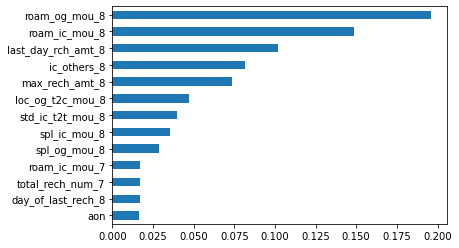

In [270]:
X = train_data
features = X.columns.values
X.loc[:, df_train.columns != 'churn_probability'] = pd.DataFrame(scaler.transform(X.loc[:, df_train.columns != 'churn_probability']))
X.columns = features


importances = model_cv2.best_estimator_.feature_importances_
weights = pd.Series(importances,
                 index=X.loc[:, df_train.columns != 'churn_probability'] .columns.values)
weights.sort_values()[-13:].plot(kind = 'barh')

### Applying changes on test_data set

In [260]:
test_data = pd.read_csv('test.csv')   #Load testdata

test_data[["date_of_last_rech_6", "date_of_last_rech_7", "date_of_last_rech_8"]] = test_data[["date_of_last_rech_6", "date_of_last_rech_7", "date_of_last_rech_8"]].apply(pd.to_datetime)

test_data["day_of_last_rech_6"] = test_data['date_of_last_rech_6'].dt.day
test_data["day_of_last_rech_7"] = test_data['date_of_last_rech_7'].dt.day
test_data["day_of_last_rech_8"] = test_data['date_of_last_rech_8'].dt.day

cols = X_train.columns

test_data1 = test_data.loc[:,cols]


In [261]:
#Imputing 

for col in cols:
    test_data1[col].fillna(test_data1[col].mean(), inplace = True) 

In [262]:
#Scaling Test_data set

test_data1[cols] = scaler.transform(test_data1[cols])

In [268]:
#Downloading the submission file to local
y_predicted = rf_best.predict(test_data1)
submission = pd.DataFrame({"id":test_data['id'],
                          "churn_probability":y_predicted})
submission.to_csv('Telecom_churn_submissione1.csv',index = False)

- Random forest Seems to give better model of all other models.
- 13 max features are selected using Random search CV
- 8th month KPIs are strong indicatiors of churn
- Outgoing minutes of Usage and Incoming minutes of ussage are strong indicators of churn
- Day of last recharge and age on network too hints on Churning of a customer